In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.22


In [33]:
def build(robot):
    Box(robot,x=10,y=5,width=4,height=1,name='bob')

In [36]:
def act_with_time_but_bad(t,robot):
    if t<5.3:
        robot['bob'].F=100
        robot['bob'].F_angle=90
        robot.message='Move Up!'
    else:
        robot['bob'].F=0
        robot.message='Stop'
        

In [46]:
def act(t,robot):
    if robot['bob'].y<20:
        robot['bob'].F=100
        robot['bob'].F_angle=90
        robot.message='Move Up!'
    else:
        robot['bob'].F=0
        robot.message='Stop'
        

In [48]:
def act(t,robot):
    if robot['bob'].y<20:
        robot['bob'].F=100
        robot['bob'].F_angle=90
        robot.message='Move Up!'
    else:
        robot['bob'].F=100
        robot['bob'].F_angle=-90
        robot.message='Move Down!'
        

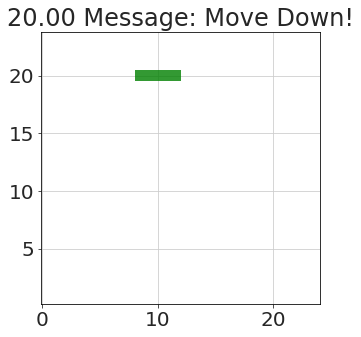

In [50]:
env=Environment(width=24,height=24,linearDamping=20) 
robot=Robot(env)
build(robot)


run_sim(env,act,
        total_time=20,  # seconds
        dt=1/60,
        dt_display=.3,  # make this larger for a faster display
        figure_width=5,
        plot_orientation=False,
       )    


In [21]:
def force_up(t,robot):
    robot['bob'].F=100
    robot['bob'].F_angle=90

def force_down(t,robot):
    robot['bob'].F=100
    robot['bob'].F_angle=-90
    
def close_to_ceiling(t,robot):
    if robot['bob'].y>20:
        return True
    
def close_to_floor(t,robot):
    if robot['bob'].y<5:
        return True

In [55]:
state_machine=StateMachine(
    {
     'moving_up':([force_up,close_to_ceiling],'moving_down'),
     'moving_down':([force_down,close_to_floor],'_end_simulation'),
    },
    first_state='moving_up'
)

def monitor(t,robot):
    robot.message=robot.controller.current_state  

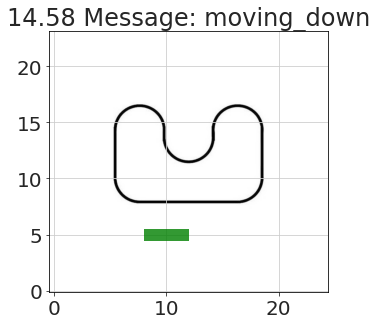

In [56]:
env=Environment(image='../images/linepath1.jpeg',width=24,linearDamping=20) 
robot=Robot(env)
build(robot)

robot.controller=Controller(robot,state_machine)
robot.controller.monitor=monitor


run_sim(env,robot.controller,
        total_time=250,  # seconds
        dt=1/60,
        dt_display=1,  # make this larger for a faster display
        figure_width=5,
        plot_orientation=False,
       )    


Move up until y==10, move sideways until we see the line

In [72]:
def force_sideways(t,robot):
    robot['bob'].F=100
    robot['bob'].F_angle=0
    
def is_there_a_line(t,robot):
    color=robot['bob'].read_color()
    if color[0]<50:
        return True
    
def close_to_ceiling(t,robot):
    if robot['bob'].y>10:
        return True
    

In [75]:
state_machine=StateMachine(
    {
     'moving_up':([force_up,close_to_ceiling],'move_sideways'),
     'move_sideways':([force_sideways,is_there_a_line],'moving_down'),
     'moving_down':([force_down,close_to_floor],'_end_simulation'),
    },
    first_state='moving_up'
)

def monitor(t,robot):
    robot.message=robot.controller.current_state + " " + str(robot['bob'].read_color())

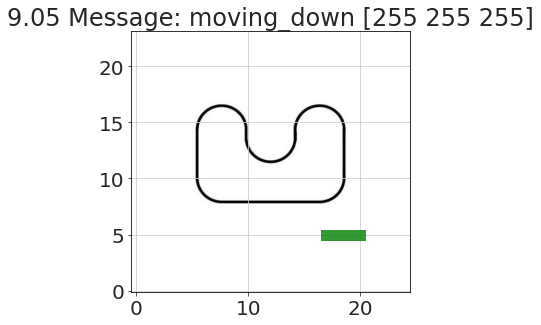

In [76]:
env=Environment(image='../images/linepath1.jpeg',width=24,linearDamping=20) 
robot=Robot(env)
build(robot)

robot.controller=Controller(robot,state_machine)
robot.controller.monitor=monitor


run_sim(env,robot.controller,
        total_time=250,  # seconds
        dt=1/60,
        dt_display=.1,  # make this larger for a faster display
        figure_width=5,
        plot_orientation=False,
       )    
